In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk import word_tokenize,pos_tag
import spacy
from collections import Counter

In [15]:



path = os.getcwd()
df = pd.read_csv(path+'\csv\\newchampions.csv',sep=';')

Lore lens: [4391, 4845, 4721, 4884, 533, 3697, 4225, 4473, 4008, 8528, 4868, 5060, 3974, 4952, 4325, 4243, 5415, 8781, 1585, 3479, 5455, 3963, 4773, 3912, 4781, 4609, 4030, 5036, 4583, 4565, 13104, 3900, 3914, 1572, 5255, 5036, 5081, 5168, 4955, 4533, 11212, 9495, 8016, 4488, 4614, 4353, 4351, 453, 5051, 5359, 1949, 4874, 6224, 5139, 2128, 4762, 4640, 4354, 4654, 5462, 6320, 4722, 5654, 4690, 5103, 4501, 11410, 4538, 7355, 4299, 490, 5214, 4024, 2957, 5139, 4999, 11570, 4595, 4200, 494, 8533, 5658, 5454, 5125, 1756, 5803, 10076, 4281, 4925, 5282, 4557, 3782, 1783, 8237, 4296, 533, 5440, 3263, 1340, 1347, 4504, 4378, 4774, 5201, 6624, 3998, 3064, 9729, 4350, 9127, 4576, 4497, 4757, 4322, 4567, 5250, 5047, 4576, 4591, 3600, 3599, 5623, 4629, 4335, 4019, 4559, 4863, 4259, 3736, 3474, 9454, 3835, 4271, 1608, 365, 3332, 4263, 9186, 4692, 4022, 5216, 4323, 4882, 4792, 4636, 4267, 4582, 2851, 3707, 4896, 4133, 374, 4408, 7407, 4303, 4710, 4926]
Y: (157,)
X: (157,)


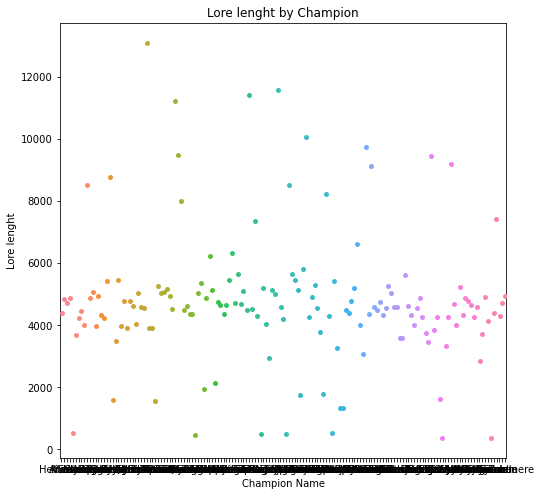

In [8]:
# Lore Lenght
lores = df[['lore']]
lore_lens = []

for i in range(0,157):
    lore = lores.iloc[i,0]
    lore_lens.append(len(lore))
print('Lore lens: ' + str(lore_lens))

y = np.array(lore_lens)
print('Y: ' + str(y.shape))

names = df[['name']]

x = np.array(names)
x = x.flatten()
print('X: ' + str(x.shape))

plt.figure(figsize=(8,8))
ax = sns.stripplot(x, y);
ax.set(xlabel ='Champion Name', ylabel ='Lore lenght')
plt.title('Lore lenght by Champion');
plt.show()

In [87]:
# NLTK Downloads
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\neves\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


'Buildings, airports, highways, bridges, etc.'

In [17]:
# NER



lores = df[['lore']]
nlp = spacy.load('en_core_web_sm')

names = []

for name in df['name']:
    names.append(name)
    

for champ_num in range(0,len(lores)):

    lore = lores.iloc[champ_num,0]

    sentence = lore

    doc = nlp(sentence)

    num_person = 0
    num_gpe = 0
    num_org = 0
    num_object = 0
    num_event = 0
    num_norp = 0

    #Retrieve Different labels
    labels = []
    saved_infos = []
    for ent in doc.ents:
        labels.append(ent.label_)
        if ent.text in saved_infos:
            continue
        #if ent.label_ == 'PERSON' or ent.text in names:
        if ent.label_ == 'PERSON' and ent.text in names:
            try:
                #Error if does not exist
                error = df['lore_person_' + str(num_person)]
            except:
                df['lore_person_' + str(num_person)] = ""
            df.at[champ_num,'lore_person_' + str(num_person)]= ent.text
            num_person+=1
        elif ent.label_ == 'GPE' or ent.label_ == 'LOC':
            try:
                #Error if does not exist
                error = df['lore_gpe_' + str(num_gpe)]
            except:
                df['lore_gpe_' + str(num_gpe)] = ""
            df.at[champ_num,'lore_gpe_' + str(num_gpe)]= ent.text
            num_gpe+=1
#        elif ent.label_ == 'ORG' or ent.label_ == 'FAC':
#            try:
#                #Error if does not exist
#                error = df['lore_org_' + str(num_org)]
#            except:
#                df['lore_org_' + str(num_org)] = ""
#            df.at[champ_num,'lore_org_' + str(num_org)]= ent.text
#            num_org+=1
#        elif ent.label_ == 'WORK_OF_ART':
#            try:
#                #Error if does not exist
#                error = df['lore_object_' + str(num_object)]
#            except:
#                df['lore_object_' + str(num_object)] = ""
#            df.at[champ_num,'lore_object_' + str(num_object)]= ent.text
#            num_object+=1
        elif ent.label_ == 'EVENT':
            try:
                #Error if does not exist
                error = df['lore_event_' + str(num_event)]
            except:
                df['lore_event_' + str(num_event)] = ""
            df.at[champ_num,'lore_event_' + str(num_event)]= ent.text
            num_event+=1
        elif ent.label_ == 'NORP':
            try:
                #Error if does not exist
                error = df['lore_norp_' + str(num_norp)]
            except:
                df['lore_norp_' + str(num_norp)] = ""
            df.at[champ_num,'lore_norp_' + str(num_norp)]= ent.text
            num_norp+=1
        else:
            continue
        saved_infos.append(ent.text)
        #elif ent.label_ == 'TIME' or ent.label_ == 'DATE' or ent.label_ == 'LAW' or ent.label_ == 'CARDINAL' or ent.label_ == "ORDINAL":
            #ignore = 1
        #else:
            #print("////WARNING: " + ent.text + ' ' + ent.label_)
        #print(ent.text, ent.start_char, ent.end_char, ent.label_)


#print(df['lore_person_0']) 
print(df.iloc[0:50,63:73]) 
Counter(labels)

                             lore_gpe_0 lore_person_0            lore_gpe_1  \
0                                 Noxus          Kled                Skaarl   
1                                 Notai                            Freljord   
2                           Bandle City                               Yuumi   
3                                Galrin          Sona               Demacia   
4                              Piltover                                       
5                            Tidecaller          Nami                 Rasha   
6                               Luxanna           Lux    Dauntless Vanguard   
7                                                Yone                         
8                                Kinkou          Shen              Coursing   
9                                  Zaun         Janna              Piltover   
10                             Piltover     Seraphine              Zaunites   
11                              Icathia             

Counter({'ORG': 6,
         'DATE': 1,
         'PERSON': 15,
         'CARDINAL': 1,
         'NORP': 5,
         'ORDINAL': 2})

In [18]:
df.to_csv(path+'\csv\\new_champions_by_row_ner.csv')